In [109]:
#import dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import hvplot.pandas
import requests
import folium
from api_keys import api_key
import statsmodels.api as sm
from scipy import stats
import matplotlib.ticker as ticker
import plotly.express as px
from PIL import Image, ImageDraw, ImageFont


#import csv
internet_data = pd.read_csv('../Resources/internet-data.csv')
internet_data.head()

,Country,Edition,1.1.1) Internet users,1.1.2) Fixed-line broadband subscribers,1.1.3) Mobile subscribers,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,1.2.1) Average fixed broadband upload speed,1.2.2) Average fixed broadband download speed,1.2.3) Average fixed broadband latency,...,BG15) Internet users (population),BG16) Offline population,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG22) Male mobile phone subscribers,BG23) Female mobile phone subscribers,BG24) Total fixed line broadband subscribers
0,United States,E1,81.5,31.85,119.1,NaN,NaN,25.30,51.74,45.00,...,239.23,81.65,NaN,NaN,74.6,NaN,NaN,95.0,91.0,102212000
1,United States,E2,81.9,32.73,122.6,1.1,2.1,23.40,63.31,34.77,...,276.32,46.69,1.0,2.0,85.5,87.0,86.0,95.0,93.0,105714000
2,United States,E3,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,E4,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,E5,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000


In [110]:
# printing column names so we can see full list
print(internet_data.columns)

Index(['Country', 'Edition', '1.1.1) Internet users',
       '1.1.2) Fixed-line broadband subscribers', '1.1.3) Mobile subscribers',
       '1.1.4) Gender gap in internet access',
       '1.1.5) Gender gap in mobile phone access',
       '1.2.1) Average fixed broadband upload speed',
       '1.2.2) Average fixed broadband download speed',
       '1.2.3) Average fixed broadband latency',
       '1.2.4) Average mobile upload speed',
       '1.2.5) Average mobile download speed', '1.2.6) Average mobile latency',
       '1.2.7) Bandwidth capacity', '1.3.1) Network coverage (min. 2G)',
       '1.3.2) Network coverage (min. 3G)',
       '1.3.3) Network coverage (min. 4G)', '1.3.4) 5G deployment',
       '1.3.5) Government initiatives to make Wi-Fi available',
       '1.3.6) Private sector initiatives to make Wi-Fi available',
       '1.3.7) Unlicensed spectrum policy', '1.3.8) Internet exchange points',
       '1.4.1) Urban electricity access', '1.4.2) Rural electricity access',
       '2.1.

In [111]:
edition_mapping = {'E1': 2017, 'E2': 2018, 'E3': 2019, 'E4': 2020, 'E5': 2021}

internet_data['Edition'] = internet_data['Edition'].map(edition_mapping)

internet_data

,Country,Edition,1.1.1) Internet users,1.1.2) Fixed-line broadband subscribers,1.1.3) Mobile subscribers,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,1.2.1) Average fixed broadband upload speed,1.2.2) Average fixed broadband download speed,1.2.3) Average fixed broadband latency,...,BG15) Internet users (population),BG16) Offline population,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG22) Male mobile phone subscribers,BG23) Female mobile phone subscribers,BG24) Total fixed line broadband subscribers
0,United States,2017,81.5,31.85,119.1,NaN,NaN,25.30,51.74,45.00,...,239.23,81.65,NaN,NaN,74.6,NaN,NaN,95.0,91.0,102212000
1,United States,2018,81.9,32.73,122.6,1.1,2.1,23.40,63.31,34.77,...,276.32,46.69,1.0,2.0,85.5,87.0,86.0,95.0,93.0,105714000
2,United States,2019,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,2020,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,2021,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Zimbabwe,2017,21.6,1.19,92.3,NaN,NaN,7.60,8.41,73.00,...,3.14,10.67,NaN,NaN,22.7,NaN,NaN,75.0,68.0,163987
596,Zimbabwe,2018,22.1,1.22,91.8,32.4,1.2,9.12,9.52,41.92,...,3.24,10.79,12.0,1.0,23.1,37.0,25.0,81.0,80.0,170838
597,Zimbabwe,2019,24.0,1.32,99.0,45.2,2.5,9.74,9.79,45.13,...,3.85,10.39,19.0,2.0,27.1,42.0,23.0,80.0,78.0,187310
598,Zimbabwe,2020,30.3,1.41,89.4,26.3,-2.7,11.46,12.16,55.46,...,3.85,10.39,10.0,-2.0,27.1,38.0,28.0,75.0,77.0,203056


In [112]:
internet_data_nonull = internet_data.dropna(how='any')

internet_data_nonull

,Country,Edition,1.1.1) Internet users,1.1.2) Fixed-line broadband subscribers,1.1.3) Mobile subscribers,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,1.2.1) Average fixed broadband upload speed,1.2.2) Average fixed broadband download speed,1.2.3) Average fixed broadband latency,...,BG15) Internet users (population),BG16) Offline population,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG22) Male mobile phone subscribers,BG23) Female mobile phone subscribers,BG24) Total fixed line broadband subscribers
3,United States,2020,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,2021,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000
8,Algeria,2020,74.4,7.26,111.7,21.7,7.3,1.97,3.87,64.99,...,20.64,21.45,13.0,6.0,49.0,60.0,47.0,82.0,76.0,3067022
9,Algeria,2021,74.4,8.32,109.4,10.9,8.0,1.41,3.84,54.09,...,20.64,21.45,7.0,7.0,49.0,64.0,57.0,87.0,80.0,3582739
13,Angola,2020,11.3,0.36,43.1,27.8,11.2,6.86,13.55,37.29,...,4.28,25.54,8.9,7.6,14.3,34.8,25.9,71.3,63.7,109561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Vietnam,2021,46.0,15.35,141.2,13.6,4.2,52.07,50.14,8.85,...,66.27,30.19,9.0,4.0,68.7,66.0,57.0,95.0,91.0,14802380
593,Zambia,2020,17.7,0.42,89.2,24.3,4.7,8.21,10.81,57.09,...,2.48,14.87,9.0,3.0,14.3,37.0,28.0,64.0,61.0,72228
594,Zambia,2021,17.7,0.50,96.4,27.8,13.9,12.25,12.35,49.89,...,2.48,14.87,10.0,10.0,14.3,36.0,26.0,72.0,62.0,88891
598,Zimbabwe,2020,30.3,1.41,89.4,26.3,-2.7,11.46,12.16,55.46,...,3.85,10.39,10.0,-2.0,27.1,38.0,28.0,75.0,77.0,203056


In [113]:
#get rid of irrelevant columns

relevant_columns = ['Country', 'Edition', 
                '1.1.1) Internet users',
                '1.1.4) Gender gap in internet access', 
                '1.1.5) Gender gap in mobile phone access',
                '4.1.1) Level of literacy', 
                '4.1.2) Educational attainment',
                '4.1.3) Support for digital literacy', 
                'BG2) Population',
                'BG3) Urban population',
                'BG4) GNI per capita',
                'BG6) Population under the poverty line',
                'BG17) Internet access gender gap',
                'BG18) Mobile phone access gender gap', 
                'BG19) Internet users (percent of population)',
                'BG20) Male internet users', 
                'BG21) Female internet users',
                'BG22) Male mobile phone subscribers', 
                'BG23) Female mobile phone subscribers']

demographic_df = internet_data_nonull[relevant_columns]
demographic_df

,Country,Edition,1.1.1) Internet users,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,4.1.1) Level of literacy,4.1.2) Educational attainment,4.1.3) Support for digital literacy,BG2) Population,BG3) Urban population,BG4) GNI per capita,BG6) Population under the poverty line,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG22) Male mobile phone subscribers,BG23) Female mobile phone subscribers
3,United States,2020,85.3,1.1,1.1,100.0,13.4,3.0,329.1,82.3,63200,1.0,1.0,1.0,88.5,91.0,90.0,95.0,94.0
4,United States,2021,85.3,0.0,3.1,100.0,13.4,3.0,331.0,82.5,65760,1.0,0.0,3.0,88.5,94.0,94.0,97.0,94.0
8,Algeria,2020,74.4,21.7,7.3,81.4,8.0,1.0,42.9,72.6,3960,0.2,13.0,6.0,49.0,60.0,47.0,82.0,76.0
9,Algeria,2021,74.4,10.9,8.0,81.4,8.0,1.0,43.7,73.2,3970,0.2,7.0,7.0,49.0,64.0,57.0,87.0,80.0
13,Angola,2020,11.3,27.8,11.2,71.2,5.1,2.0,31.8,65.5,3210,9.6,8.9,7.6,14.3,34.8,25.9,71.3,63.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Vietnam,2021,46.0,13.6,4.2,95.0,8.2,3.0,97.3,36.6,2540,0.4,9.0,4.0,68.7,66.0,57.0,95.0,91.0
593,Zambia,2020,17.7,24.3,4.7,86.7,7.1,3.0,17.9,43.5,1460,29.5,9.0,3.0,14.3,37.0,28.0,64.0,61.0
594,Zambia,2021,17.7,27.8,13.9,86.7,7.1,3.0,18.4,44.1,1450,29.5,10.0,10.0,14.3,36.0,26.0,72.0,62.0
598,Zimbabwe,2020,30.3,26.3,-2.7,86.9,8.3,1.0,14.6,32.2,1530,9.3,10.0,-2.0,27.1,38.0,28.0,75.0,77.0


In [114]:
##Data Cleaning and Organizaion

#rename columns
newcolname_dict = {
    'Country': 'Country',
    'Edition': 'Edition',
    'BG2) Population': 'Population (Millions)',
    'BG19) Internet users (percent of population)': 'Internet Users (% of Population)',
    '4.1.1) Level of literacy': 'Literacy (% of Population)',
    '4.1.2) Educational attainment': 'Education Level (Years of Schooling)',
    '4.1.3) Support for digital literacy': 'Support for Digital Literacy (Qualitative Rating 1-3)',
    'BG3) Urban population': 'Urban Population (% of Total Population)',
    'BG4) GNI per capita': 'GNI Per Capita (USD per Person)',
    'BG6) Population under the poverty line': 'Population Under the Poverty Line (% of Population)',
    'BG17) Internet access gender gap': 'Internet Access Gender Gap (Difference in Percentage Points)',
    'BG18) Mobile phone access gender gap': 'Mobile Phone Access Gender Gap (Difference in Percengage Points)',
    'BG20) Male internet users': 'Male Internet Users (% of Male Population)',
    'BG21) Female internet users': 'Female Internet Users (% of Female Population)',
    'BG22) Male mobile phone subscribers': 'Male Mobile Phone Subscribers (% of Male Population)',
    'BG23) Female mobile phone subscribers': 'Female Mobile Phone Subscribers (% of Female Population)'
}

demographic_df_renamed = demographic_df.rename(columns=newcolname_dict)

demographic_df_renamed.head()

,Country,Edition,1.1.1) Internet users,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,Literacy (% of Population),Education Level (Years of Schooling),Support for Digital Literacy (Qualitative Rating 1-3),Population (Millions),Urban Population (% of Total Population),GNI Per Capita (USD per Person),Population Under the Poverty Line (% of Population),Internet Access Gender Gap (Difference in Percentage Points),Mobile Phone Access Gender Gap (Difference in Percengage Points),Internet Users (% of Population),Male Internet Users (% of Male Population),Female Internet Users (% of Female Population),Male Mobile Phone Subscribers (% of Male Population),Female Mobile Phone Subscribers (% of Female Population)
3,United States,2020,85.3,1.1,1.1,100.0,13.4,3.0,329.1,82.3,63200,1.0,1.0,1.0,88.5,91.0,90.0,95.0,94.0
4,United States,2021,85.3,0.0,3.1,100.0,13.4,3.0,331.0,82.5,65760,1.0,0.0,3.0,88.5,94.0,94.0,97.0,94.0
8,Algeria,2020,74.4,21.7,7.3,81.4,8.0,1.0,42.9,72.6,3960,0.2,13.0,6.0,49.0,60.0,47.0,82.0,76.0
9,Algeria,2021,74.4,10.9,8.0,81.4,8.0,1.0,43.7,73.2,3970,0.2,7.0,7.0,49.0,64.0,57.0,87.0,80.0
13,Angola,2020,11.3,27.8,11.2,71.2,5.1,2.0,31.8,65.5,3210,9.6,8.9,7.6,14.3,34.8,25.9,71.3,63.7


In [115]:
#reorder columns
new_column_order = [
    'Country',
    'Edition',
    'Population (Millions)',
    'Internet Users (% of Population)',
    'Urban Population (% of Total Population)',
    'Population Under the Poverty Line (% of Population)',
    'GNI Per Capita (USD per Person)',
    'Literacy (% of Population)',
    'Education Level (Years of Schooling)',
    'Support for Digital Literacy (Qualitative Rating 1-3)',
    'Internet Access Gender Gap (Difference in Percentage Points)',
    'Male Internet Users (% of Male Population)',
    'Female Internet Users (% of Female Population)',
    'Mobile Phone Access Gender Gap (Difference in Percengage Points)',
    'Male Mobile Phone Subscribers (% of Male Population)',
    'Female Mobile Phone Subscribers (% of Female Population)'
]

demo_data_all_years = demographic_df_renamed[new_column_order]

demo_data_all_years


,Country,Edition,Population (Millions),Internet Users (% of Population),Urban Population (% of Total Population),Population Under the Poverty Line (% of Population),GNI Per Capita (USD per Person),Literacy (% of Population),Education Level (Years of Schooling),Support for Digital Literacy (Qualitative Rating 1-3),Internet Access Gender Gap (Difference in Percentage Points),Male Internet Users (% of Male Population),Female Internet Users (% of Female Population),Mobile Phone Access Gender Gap (Difference in Percengage Points),Male Mobile Phone Subscribers (% of Male Population),Female Mobile Phone Subscribers (% of Female Population)
3,United States,2020,329.1,88.5,82.3,1.0,63200,100.0,13.4,3.0,1.0,91.0,90.0,1.0,95.0,94.0
4,United States,2021,331.0,88.5,82.5,1.0,65760,100.0,13.4,3.0,0.0,94.0,94.0,3.0,97.0,94.0
8,Algeria,2020,42.9,49.0,72.6,0.2,3960,81.4,8.0,1.0,13.0,60.0,47.0,6.0,82.0,76.0
9,Algeria,2021,43.7,49.0,73.2,0.2,3970,81.4,8.0,1.0,7.0,64.0,57.0,7.0,87.0,80.0
13,Angola,2020,31.8,14.3,65.5,9.6,3210,71.2,5.1,2.0,8.9,34.8,25.9,7.6,71.3,63.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Vietnam,2021,97.3,68.7,36.6,0.4,2540,95.0,8.2,3.0,9.0,66.0,57.0,4.0,95.0,91.0
593,Zambia,2020,17.9,14.3,43.5,29.5,1460,86.7,7.1,3.0,9.0,37.0,28.0,3.0,64.0,61.0
594,Zambia,2021,18.4,14.3,44.1,29.5,1450,86.7,7.1,3.0,10.0,36.0,26.0,10.0,72.0,62.0
598,Zimbabwe,2020,14.6,27.1,32.2,9.3,1530,86.9,8.3,1.0,10.0,38.0,28.0,-2.0,75.0,77.0


In [116]:
# Group the data by 'Country' and calculate the mean for each country
# Replace 'df' with your DataFrame name
demo_data_agg = demo_data_all_years.groupby('Country').mean()

# Reset the index so 'Country' becomes a column again
demo_data_agg = demo_data_agg.reset_index()

# Now, aggregated_data contains the average of all numeric columns for each country


## Internet Usage by Country

In [117]:
# setting function and loop to get lat/long for our countries map showing internet usage by country where each country dot is sized based on % internet usage

demo_df = demo_data_agg.copy()

demo_df['Latitude'] = None
demo_df['Longitude'] = None

def get_coordinates(country, api_key):
    base_url = "https://api.geoapify.com/v1/geocode/search"
    params = {
        'country': country,
        'apiKey': api_key}
    response = requests.get(base_url, params=params)
    data = response.json()
    coordinates = data['features'][0]['geometry']['coordinates']
    return coordinates[1], coordinates[0]

#loop through countries in dataset
for country in demo_df['Country'].unique():
    lat, long = get_coordinates(country, api_key)
    demo_df.loc[demo_df['Country'] == country, 'Latitude'] = lat
    demo_df.loc[demo_df['Country'] == country, 'Longitude'] = long

In [118]:
# display head values of new demo DataFrame that will be used for all further analysis

demo_df.reset_index()
demo_df.columns

Index(['Country', 'Edition', 'Population (Millions)',
       'Internet Users (% of Population)',
       'Urban Population (% of Total Population)',
       'Population Under the Poverty Line (% of Population)',
       'GNI Per Capita (USD per Person)', 'Literacy (% of Population)',
       'Education Level (Years of Schooling)',
       'Support for Digital Literacy (Qualitative Rating 1-3)',
       'Internet Access Gender Gap (Difference in Percentage Points)',
       'Male Internet Users (% of Male Population)',
       'Female Internet Users (% of Female Population)',
       'Mobile Phone Access Gender Gap (Difference in Percengage Points)',
       'Male Mobile Phone Subscribers (% of Male Population)',
       'Female Mobile Phone Subscribers (% of Female Population)', 'Latitude',
       'Longitude'],
      dtype='object')

In [119]:
#take sqrt to show scale better
scaled_internet_users = np.sqrt(demo_df['Internet Users (% of Population)']) * 100
# Multiplied by 100 for better scaling

#plotting
plot = demo_df.hvplot.points('Longitude',
                             'Latitude',
                             geo=True,
                             size=scaled_internet_users,
                             hover_cols=['Country', 'Internet Users (% of Population)'],
                             tiles='EsriTerrain',
                             alpha=0.7,
                             color='Country',
                             frame_width=800,
                             frame_height=600,
                             title='Global Internet Usage by Country')


#display
plot



:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,_size,Internet Users (% of Population))

In [120]:
#heat map of internet usage by country

fig = px.density_mapbox(demo_df,
                        lat='Latitude',
                        lon='Longitude',
                        z= scaled_internet_users,
                        radius=10,
                        center=dict(lat=0, lon=180),
                        zoom=0,
                        mapbox_style="open-street-map",
                        hover_data=['Country'])
# Save the figure
plt.savefig("Graphics/Usage_Heatmap.png")

fig.show()



<Figure size 640x480 with 0 Axes>

## Internet Usage by Gender

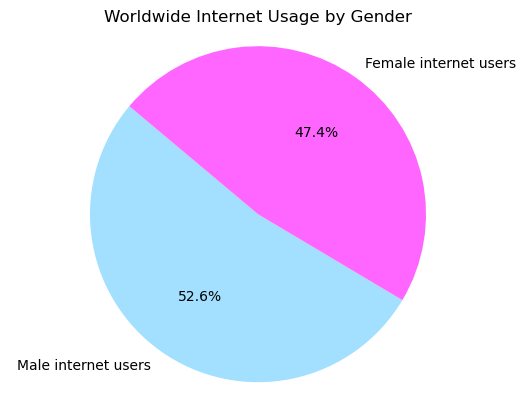

In [121]:
#pie chart of male vs female internet users

categories = ['Male internet users', 'Female internet users']
sizes = [internet_data["BG20) Male internet users"].sum(), internet_data["BG21) Female internet users"].sum()]

plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#A3E0FF', '#FF66FF'])
plt.title('Worldwide Internet Usage by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the figure
plt.savefig("Graphics/Usage_Gender_Pie.png")

plt.show()



c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



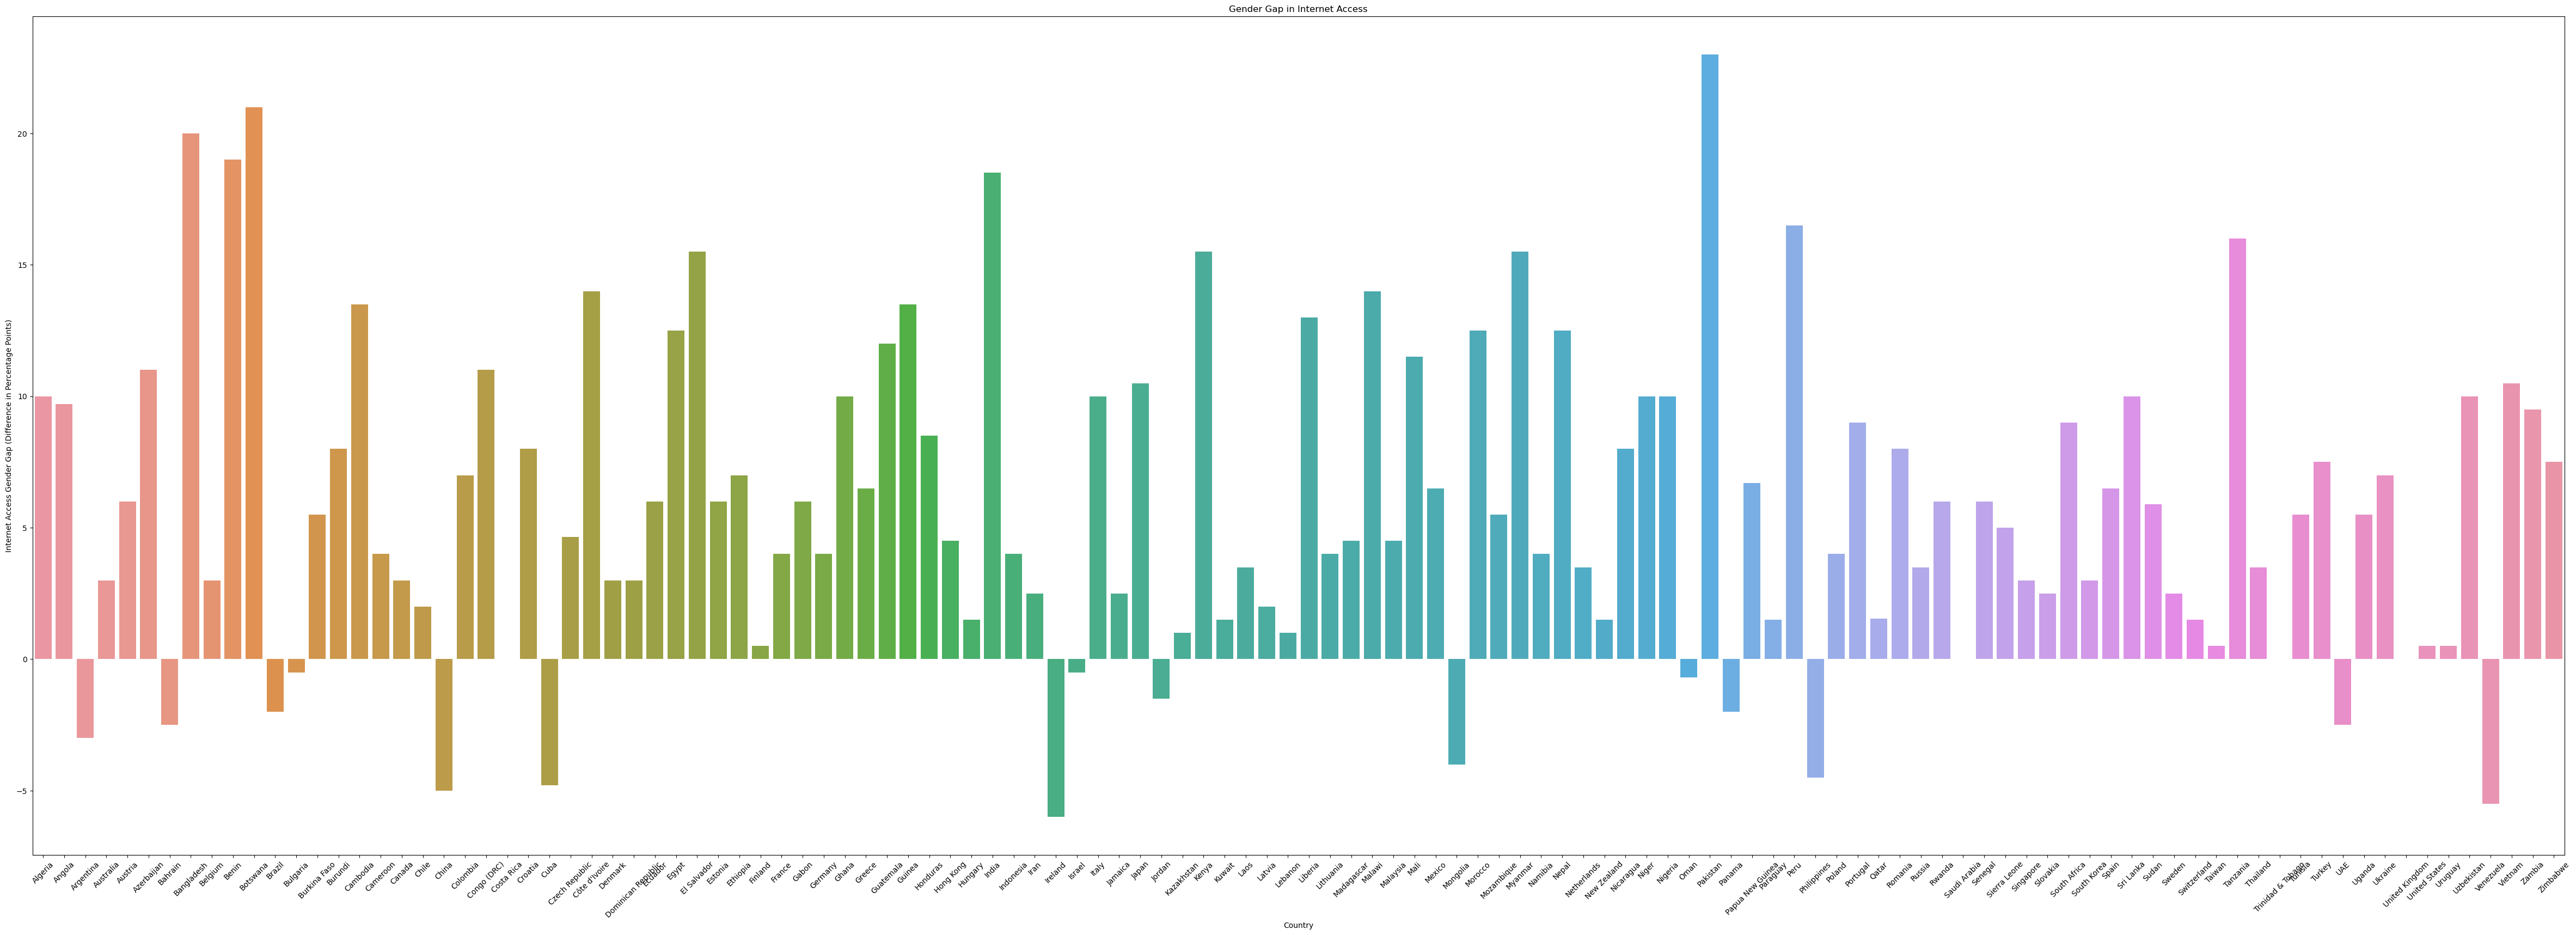

In [122]:
# Plot for Internet Access Gender Gap
plt.figure(figsize=(60
                , 20))
sns.barplot(x='Country', y='Internet Access Gender Gap (Difference in Percentage Points)', data=demo_df)
plt.title('Gender Gap in Internet Access')
plt.xticks(rotation=45)  # Rotate the country labels for readability

# Save the figure
plt.savefig("Graphics/Internet_Access_Gender_Gap_by_Country.png")

plt.show()




c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



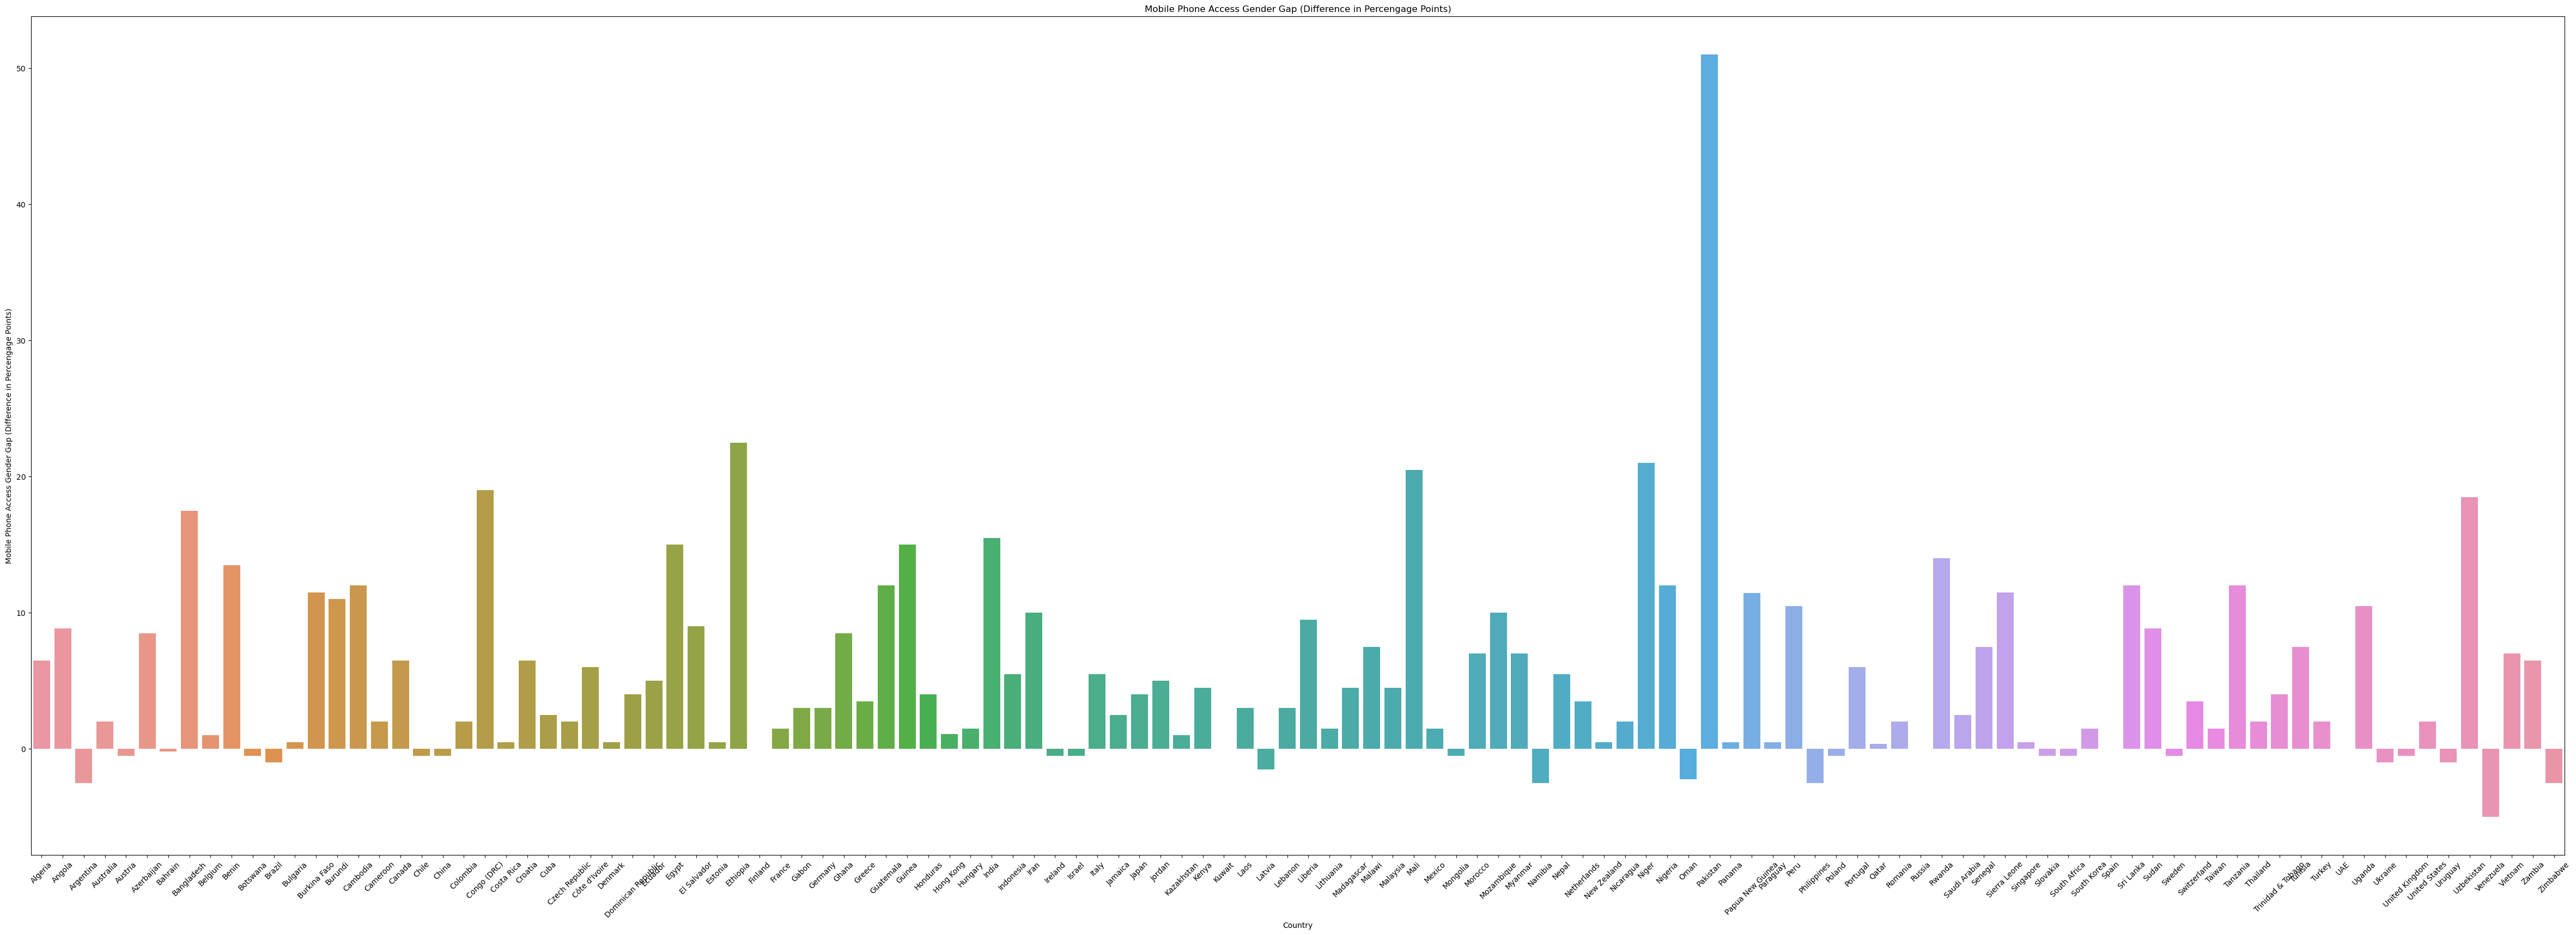

In [123]:
plt.figure(figsize=(60
                , 20))
sns.barplot(x='Country', y='Mobile Phone Access Gender Gap (Difference in Percengage Points)', data=demo_df)
plt.title('Mobile Phone Access Gender Gap (Difference in Percengage Points)')
plt.xticks(rotation=45)  # Rotate the country labels for readability

# Save the figure
plt.savefig("Graphics/Mobile_Phone_Access_Gender_Gap.png")

plt.show()

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



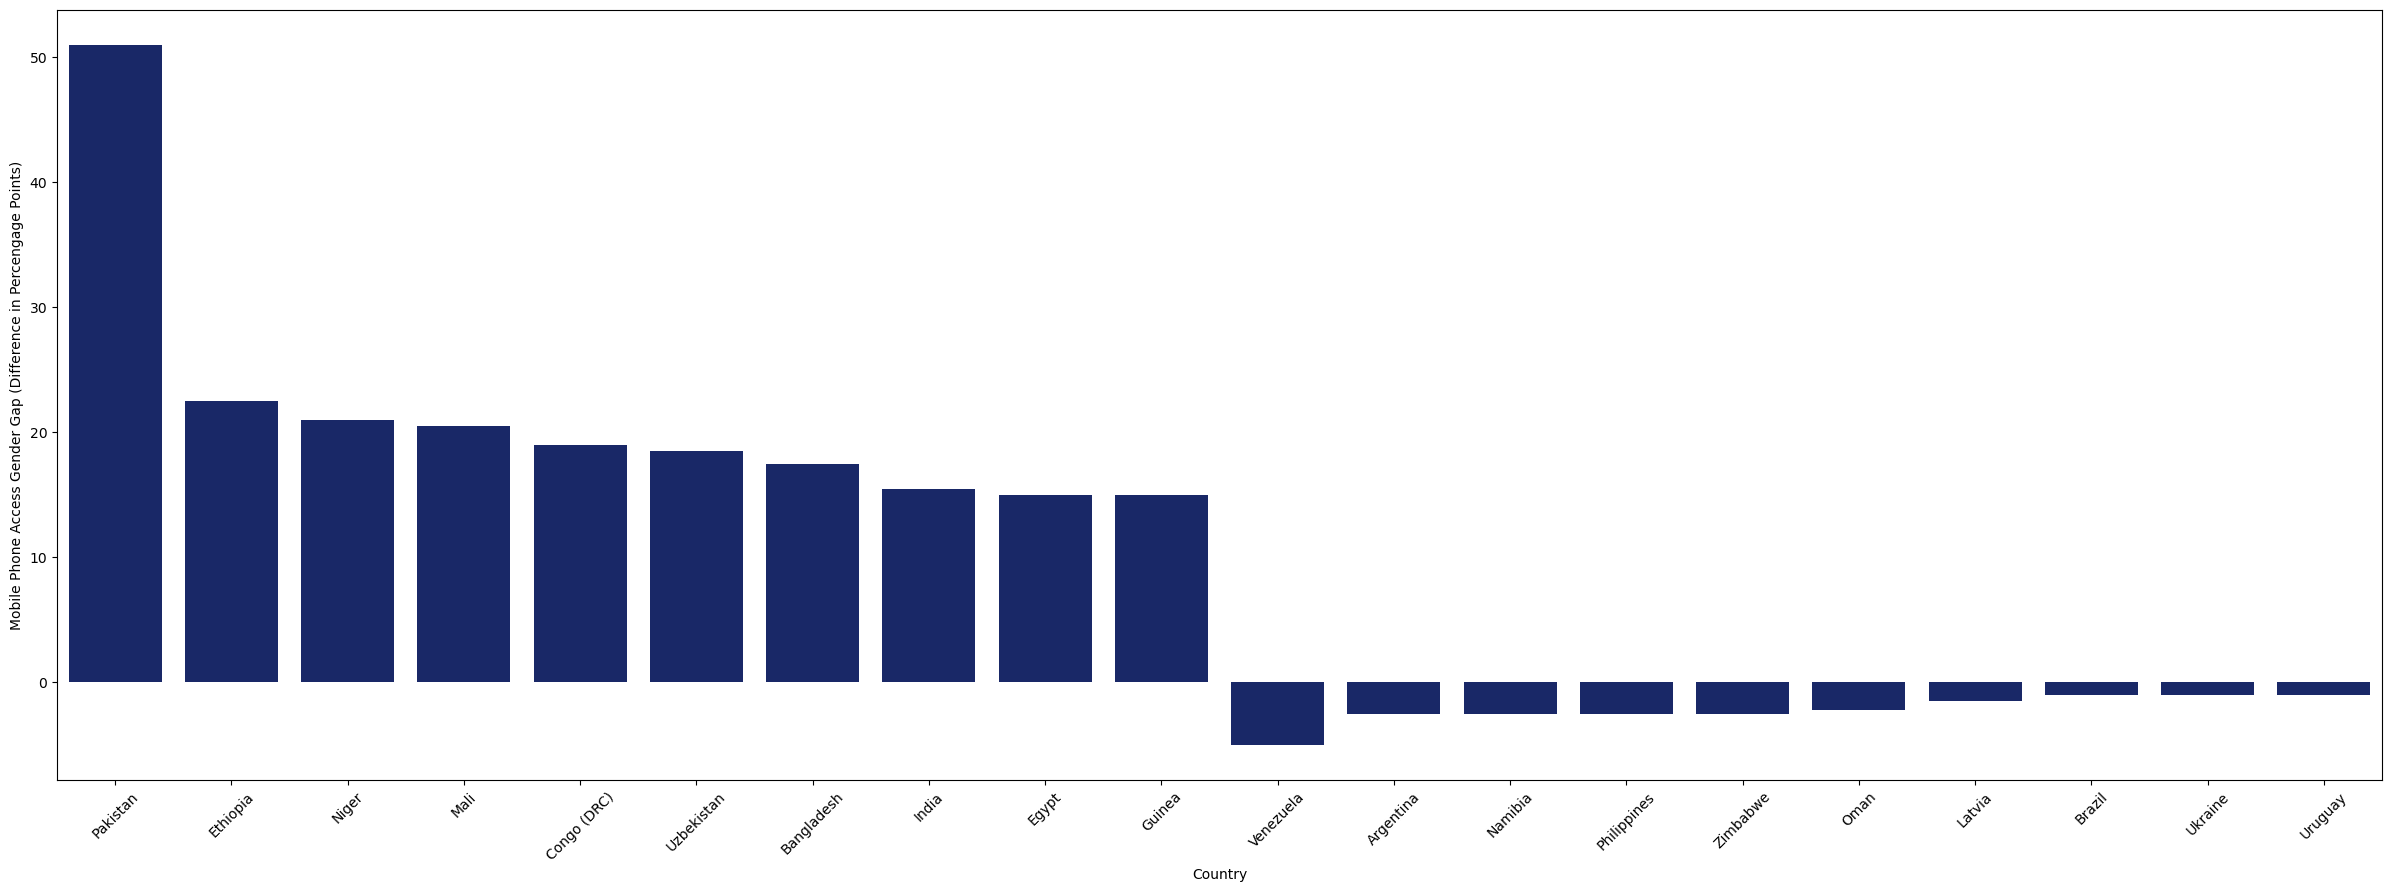

In [124]:
top_n = demo_df.nlargest(10, 'Mobile Phone Access Gender Gap (Difference in Percengage Points)')
bottom_n = demo_df.nsmallest(10, 'Mobile Phone Access Gender Gap (Difference in Percengage Points)')
combined = pd.concat([top_n, bottom_n])

plt.figure(figsize=(30, 10))
sns.barplot(x='Country', y='Mobile Phone Access Gender Gap (Difference in Percengage Points)', data=combined, color='#0C2074')
plt.xticks(rotation=45)

# Save the figure
# plt.savefig("Graphics/NotSureWhatToCallThisOne.png")

plt.show()

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



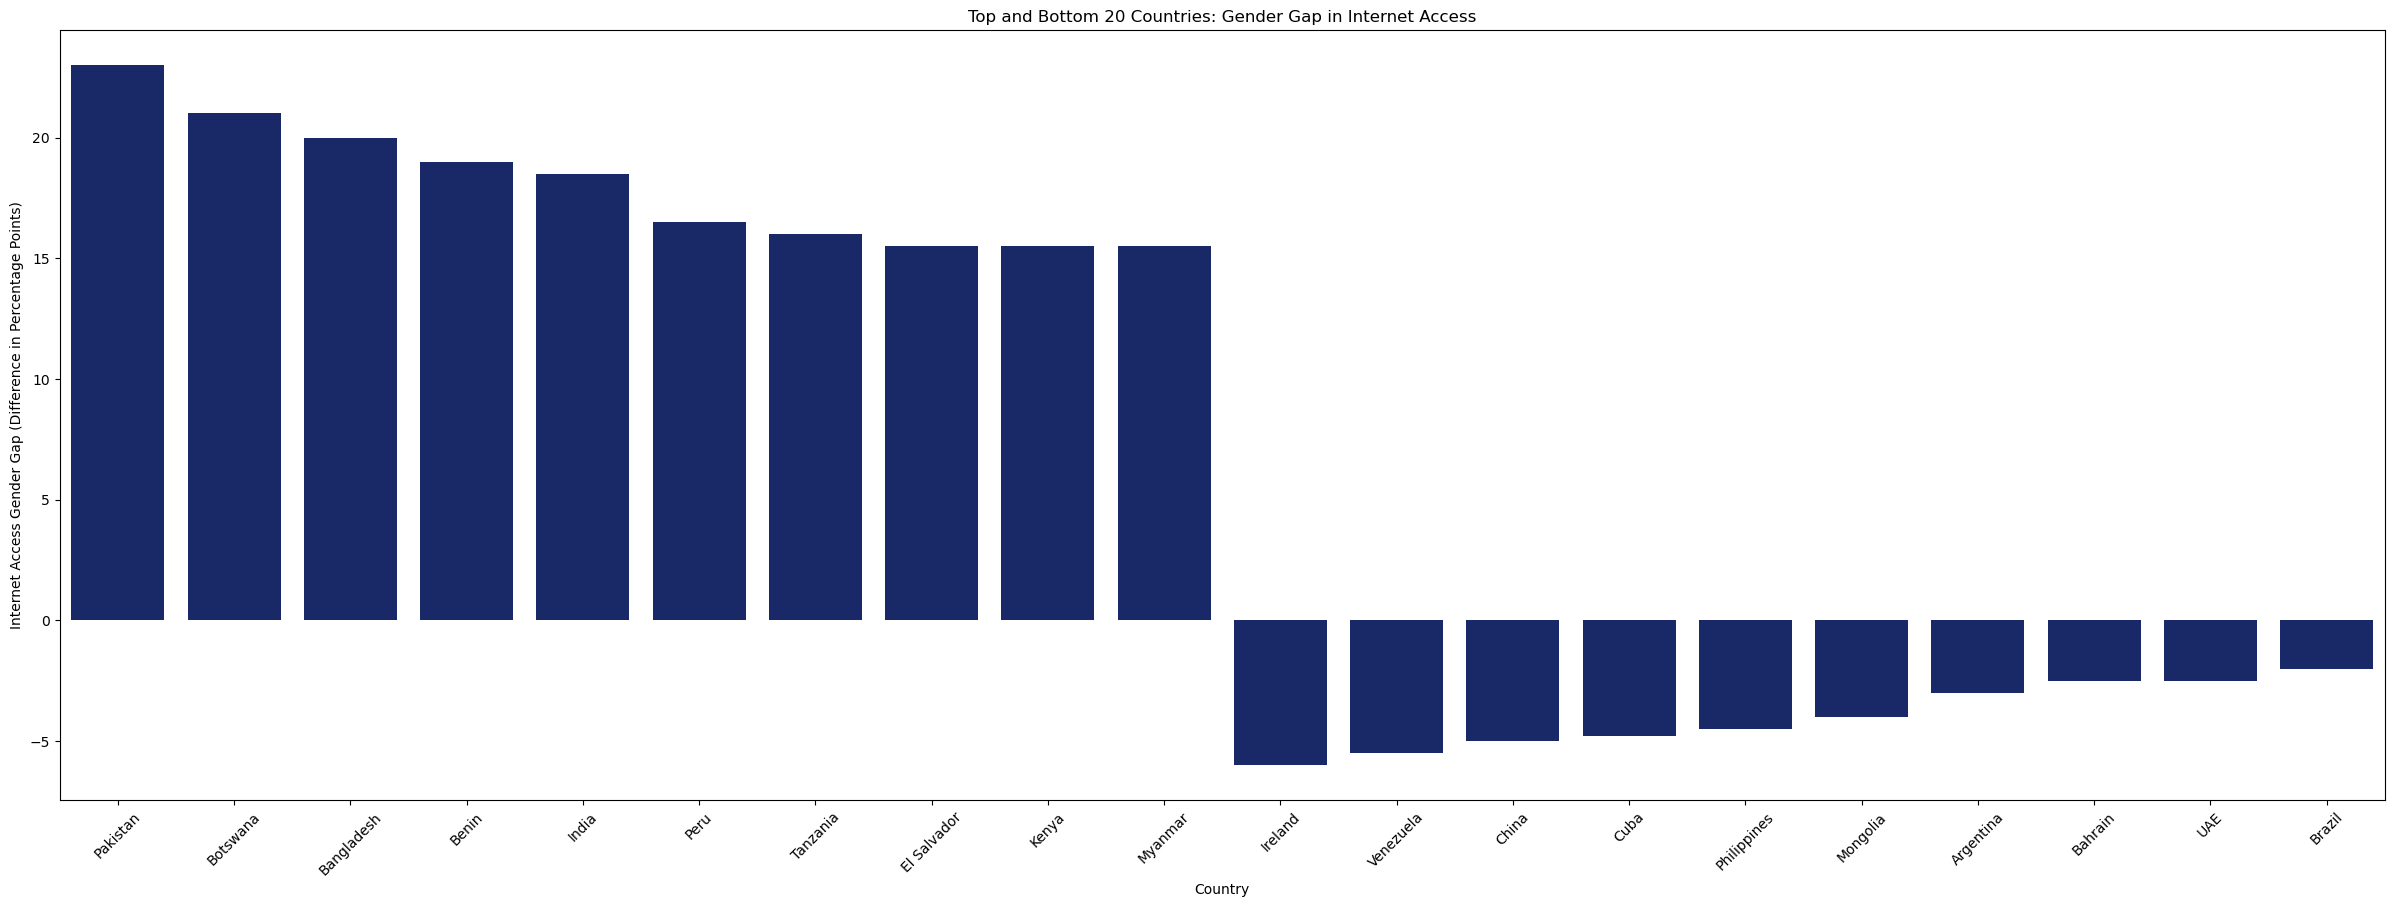

In [125]:
top_n = demo_df.nlargest(10, 'Internet Access Gender Gap (Difference in Percentage Points)')
bottom_n = demo_df.nsmallest(10, 'Internet Access Gender Gap (Difference in Percentage Points)')
combined = pd.concat([top_n, bottom_n])

plt.figure(figsize=(30, 10))
sns.barplot(x='Country', y='Internet Access Gender Gap (Difference in Percentage Points)', data=combined, color='#0C2074')
plt.title('Top and Bottom 20 Countries: Gender Gap in Internet Access')
plt.xticks(rotation=45)

# Save the figure
plt.savefig("Graphics/Top_Bottom_Countries_Gender_Gap.png")

plt.show()

## Internet Usage by Education

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



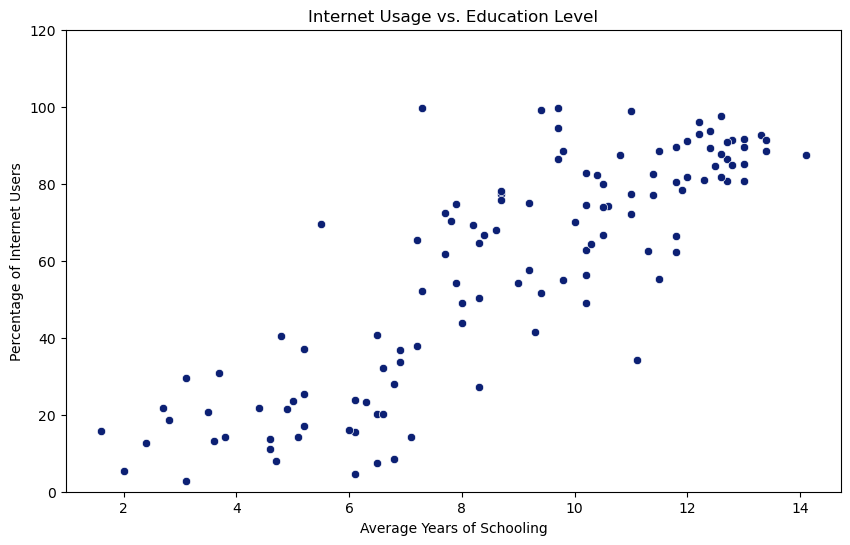

In [126]:
education_col = 'Education Level (Years of Schooling)'
gni_per_capita_col = 'GNI Per Capita (USD per Person)'
internet_users_col = 'Internet Users (% of Population)'


#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demo_df, x=education_col, y=internet_users_col, color='#0C2074')
plt.title('Internet Usage vs. Education Level')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Percentage of Internet Users')
plt.ylim([0, 120])

plt.show()

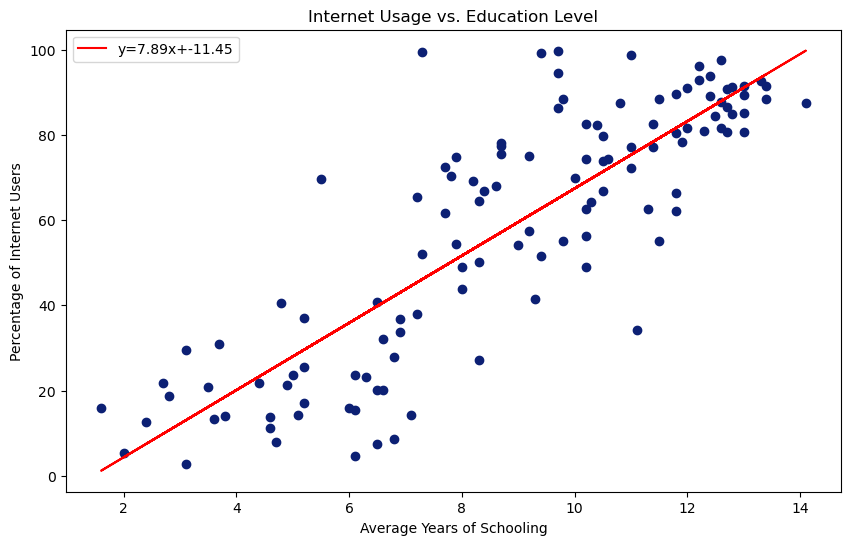

R-squared: 0.71


In [127]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(demo_df[education_col], demo_df[internet_users_col])

line = slope * demo_df[education_col] + intercept

#plotting
plt.figure(figsize=(10, 6))
plt.scatter(demo_df[education_col], demo_df[internet_users_col], alpha=1, color='#0C2074')
plt.plot(demo_df[education_col], line, label=f'y={slope:.2f}x+{intercept:.2f}', color='red')
plt.title('Internet Usage vs. Education Level')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Percentage of Internet Users')
plt.legend()

# Save the figure
plt.savefig("Graphics/Internet_Usage_Vs_Education_Level.png")

plt.show()

print(f"R-squared: {r_value**2:.2f}")

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



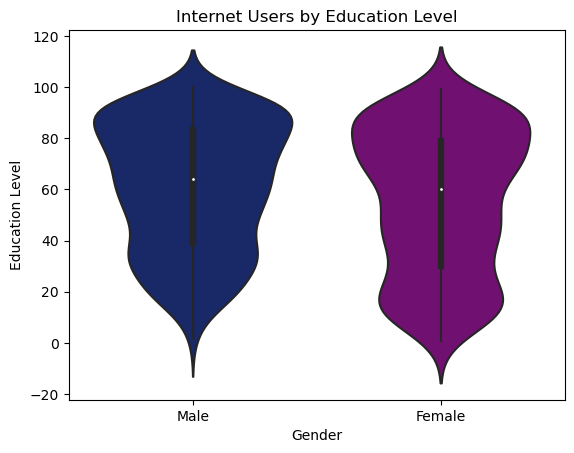

In [128]:
# Example of restructuring the data
reshaped_data = pd.melt(internet_data, id_vars=['4.1.2) Educational attainment'],
                        value_vars=['BG20) Male internet users', 'BG21) Female internet users'],
                        var_name='Gender', value_name='Education Level')

# Map the variable names to more readable form
reshaped_data['Gender'] = reshaped_data['Gender'].map({'BG20) Male internet users': 'Male', 
                                                       'BG21) Female internet users': 'Female'})
palette = {'Male': '#0C2074', 'Female': 'purple'}
# Now plot with the reshaped data
sns.violinplot(x='Gender', y='Education Level', data=reshaped_data, palette=palette)
plt.title('Internet Users by Education Level')

# Save the figure
plt.savefig("Graphics/Violin_Chart.png")

plt.show()

# box and whisker plot??



## Internet Usage by Literacy

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



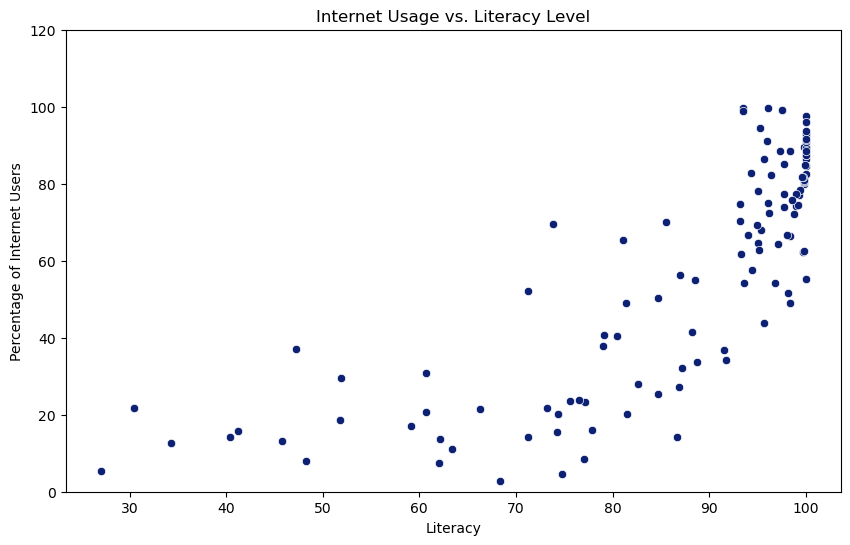

In [129]:
literacy_col = 'Literacy (% of Population)'

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demo_df, x=literacy_col, y=internet_users_col, color='#0C2074')
plt.title('Internet Usage vs. Literacy Level')
plt.xlabel('Literacy')
plt.ylabel('Percentage of Internet Users')
plt.ylim([0, 120])

plt.show()


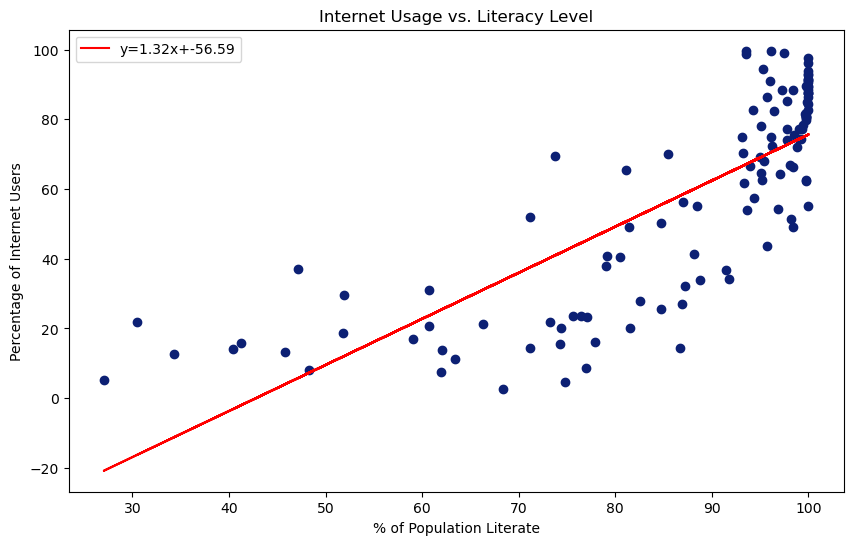

R-squared: 0.63


In [130]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(demo_df[literacy_col], demo_df[internet_users_col])

line = slope * demo_df[literacy_col] + intercept

#plotting
plt.figure(figsize=(10, 6))
plt.scatter(demo_df[literacy_col], demo_df[internet_users_col], alpha=1, color='#0C2074')
plt.plot(demo_df[literacy_col], line, label=f'y={slope:.2f}x+{intercept:.2f}', color='red')
plt.title('Internet Usage vs. Literacy Level')
plt.xlabel('% of Population Literate')
plt.ylabel('Percentage of Internet Users')
plt.legend()

# Save the figure
plt.savefig("Graphics/Internet_Usage_Vs_Literacy_Level.png")

plt.show()

print(f"R-squared: {r_value**2:.2f}")

## Internet Usage by Urban Population

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



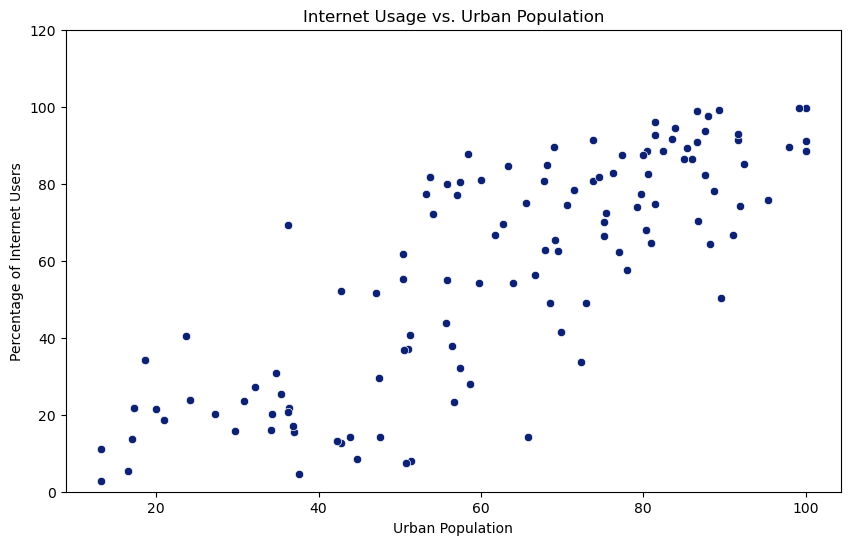

In [131]:
urbanpop_col = 'Urban Population (% of Total Population)'

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demo_df, x=urbanpop_col, y=internet_users_col, color = '#0C2074')
plt.title('Internet Usage vs. Urban Population')
plt.xlabel('Urban Population')
plt.ylabel('Percentage of Internet Users')
plt.ylim([0, 120])

plt.show()

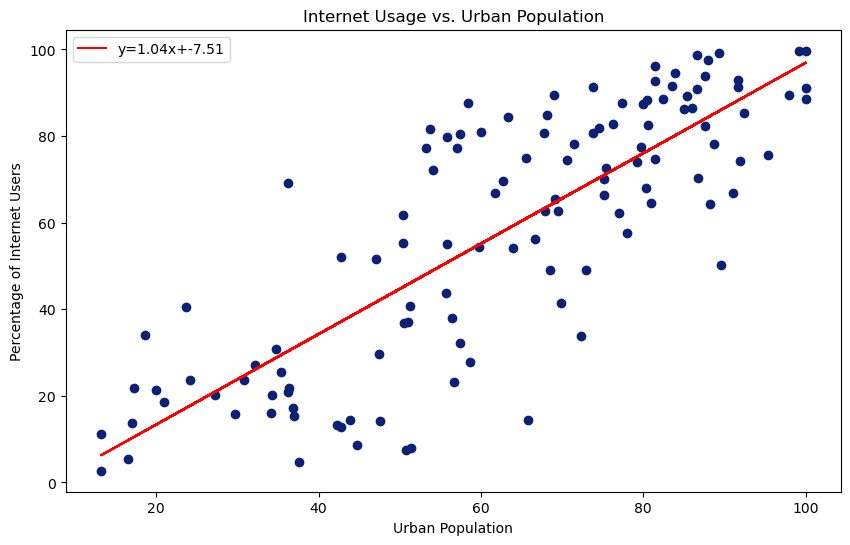

R-squared: 0.66


In [132]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(demo_df[urbanpop_col], demo_df[internet_users_col])

line = slope * demo_df[urbanpop_col] + intercept

#plotting
plt.figure(figsize=(10, 6))
plt.scatter(demo_df[urbanpop_col], demo_df[internet_users_col], alpha=1, color='#0C2074')
plt.plot(demo_df[urbanpop_col], line, label=f'y={slope:.2f}x+{intercept:.2f}', color='red')
plt.title('Internet Usage vs. Urban Population')
plt.xlabel('Urban Population')
plt.ylabel('Percentage of Internet Users')
plt.legend()

# Save the figure
plt.savefig("Graphics/Internet_Usage_Vs_Urban_Population.png")

plt.show()

print(f"R-squared: {r_value**2:.2f}")

# Multiple Regression Analysis of Socio-Economic Variables (GNI Per Capita & Pop. Under Poverty Line)

In [133]:
data = {
    'Internet Users': demo_df['Internet Users (% of Population)'],  # Dependent variable
    'GNI Per Capita': demo_df['GNI Per Capita (USD per Person)'],  # Independent variable 1
    'Population Under Poverty Line': demo_df['Population Under the Poverty Line (% of Population)']  # Independent variable 2
}
df = pd.DataFrame(data)

# Convert data to numeric format and handle non-numeric entries
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values that might have been introduced during conversion
df = df.dropna()

# Define the dependent variable
y = df['Internet Users']

# Define the independent variables
X = df[['GNI Per Capita', 'Population Under Poverty Line']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

model_summary = model.summary().as_text()

# Create an image with white background
img = Image.new('RGB', (800, 600), color = (255, 255, 255))
d = ImageDraw.Draw(img)

# You might need to download a .ttf file for a specific font
# For basic usage, you can use a default font by commenting out the line below
# font = ImageFont.truetype("arial.ttf", 15)

# Draw the text on the image (use a font if you have one)
d.text((10,10), model_summary, fill=(0,0,0)) # , font=font

# Save the image
img.save('Graphics/Multiple_Regression_Analysis.png')

                            OLS Regression Results                            
Dep. Variable:         Internet Users   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     161.3
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           2.32e-34
Time:                        08:27:27   Log-Likelihood:                -495.91
No. Observations:                 120   AIC:                             997.8
Df Residuals:                     117   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## OLS Regression Analysis Key Highlights

#### The R-squared value is 0.734, which indicates that about 73.4% of the variability in 'Internet Users' is explained by the model. This is a relatively high value, suggesting a good fit of the model to the data.

#### The adjusted R-squared value is 0.729, very close to the R-squared, indicating that the independent variables are relevant and the model isn't overfitted with unnecessary predictors.

#### F-statistic and Prob (F-statistic): The F-statistic is 161.3 with a very low probability (2.32e-34). This suggests that the model is statistically significant, meaning it's likely providing a better fit than a model with no independent variables.

### Coefficients:

#### const (Intercept): The coefficient for the constant is 53.0533. This can be interpreted as the expected value of 'Internet Users' when all independent variables are 0.
#### GNI Per Capita: The coefficient is 0.0008, indicating a positive relationship. For every unit increase in GNI Per Capita, Internet Users increase by 0.0008 units, assuming other variables remain constant.
#### Population Under Poverty Line: The coefficient is -1.7181, showing a negative relationship. For every percentage point increase in the population under the poverty line, Internet Users decrease by about 1.7181 units, assuming other variables remain constant.

### P-values: The p-values for both independent variables are very low (almost 0), indicating that the relationships are statistically significant.

### Confidence Intervals: The 95% confidence intervals for the coefficients suggest that the true values of these coefficients are likely within these ranges.

## Internet Usage by Income

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



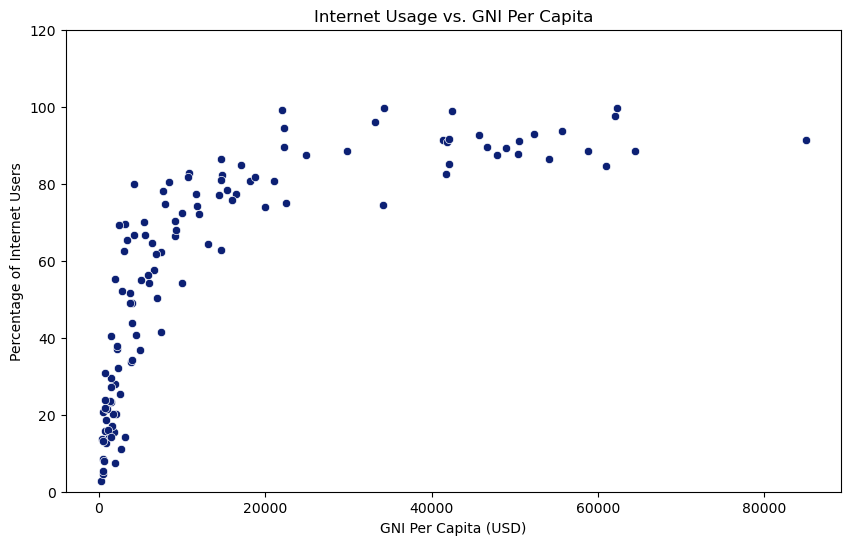

In [134]:
gni_per_capita_col = 'GNI Per Capita (USD per Person)'
internet_users_col = 'Internet Users (% of Population)'

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demo_df, x=gni_per_capita_col, y=internet_users_col, color='#0C2074')

#plotting
plt.title('Internet Usage vs. GNI Per Capita')
plt.xlabel('GNI Per Capita (USD)')
plt.ylabel('Percentage of Internet Users')
plt.ylim([0, 120])

plt.show()


## The following chart shows the previous chart applied on a logarithmic scale, with a logarithmic regression applied as well. The x-axis has been set to the logarithmic scale to help visualize the logarithmic scale more clearly. 

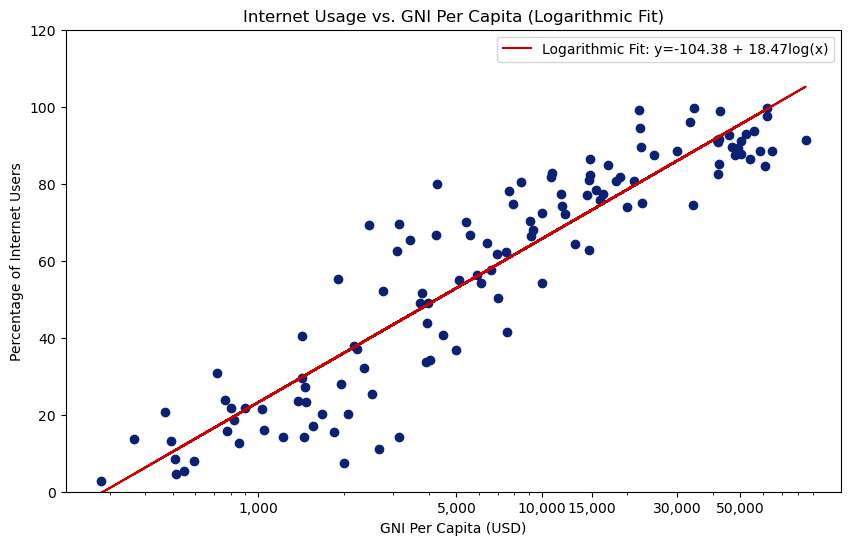

R-squared: 0.85


In [135]:
# Ensure all GNI per capita values are positive
demo_df = demo_df[demo_df[gni_per_capita_col] > 0]

# Logarithmic transformation of the GNI per capita column
log_gni_per_capita = np.log(demo_df[gni_per_capita_col])

# Linear regression on the transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_gni_per_capita, demo_df[internet_users_col])

# Calculating the regression line values
log_line = intercept + slope * log_gni_per_capita

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(demo_df[gni_per_capita_col], demo_df[internet_users_col], alpha=1, color='#0C2074')

# Plot the regression line on the original GNI per capita scale
plt.plot(demo_df[gni_per_capita_col], log_line, color='#CC0000', label=f'Logarithmic Fit: y={intercept:.2f} + {slope:.2f}log(x)')
plt.title('Internet Usage vs. GNI Per Capita (Logarithmic Fit)')
plt.xlabel('GNI Per Capita (USD)')
plt.ylabel('Percentage of Internet Users')
plt.xscale('log')  # Set x-axis to logarithmic scale
desired_ticks = [1000, 5000, 10000, 15000, 30000, 50000]  # Choose the ticks that make sense for your data
plt.xticks(desired_ticks, desired_ticks)
plt.ylim([0, 120])
plt.legend()

# Formatting tick labels for readability
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

# Save the figure
plt.savefig("Graphics/Internet_Usage_Vs_GNI_Per_Capita_(Logarithmic).png")

plt.show()

print(f"R-squared: {r_value**2:.2f}")


## Internet Usage by % of Population Under Poverty Line

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\q2the\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



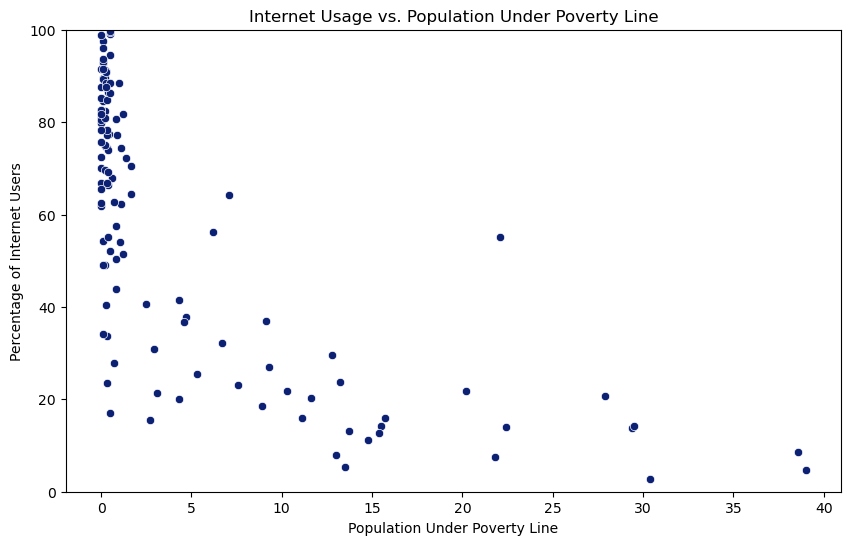

In [136]:
poverty_col= 'Population Under the Poverty Line (% of Population)'

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demo_df, x=poverty_col, y=internet_users_col, color = '#0C2074')
plt.title('Internet Usage vs. Population Under Poverty Line')
plt.xlabel('Population Under Poverty Line')
plt.ylabel('Percentage of Internet Users')
plt.ylim([0, 100])

plt.show()

## The following chart shows the previous chart applied on a logarithmic scale, with a logarithmic regression applied as well. The x-axis has been set to the logarithmic scale to help visualize the logarithmic scale more clearly. 

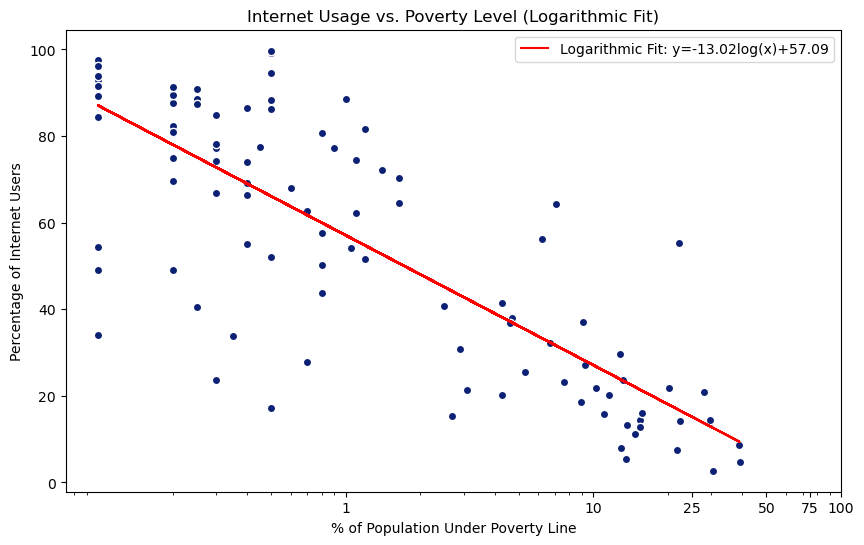

R-squared: 0.64


In [137]:
# Ensure all poverty level values are positive
demo_df = demo_df[demo_df[poverty_col] > 0]

# Logarithmic transformation of the poverty column
log_poverty = np.log(demo_df[poverty_col])

# Linear regression on the transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_poverty, demo_df[internet_users_col])

# Regression line
log_line = slope * log_poverty + intercept

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(demo_df[poverty_col], demo_df[internet_users_col], alpha=1, color='#0C2074', edgecolors='white')
plt.plot(demo_df[poverty_col], log_line, label=f'Logarithmic Fit: y={slope:.2f}log(x)+{intercept:.2f}', color='red')
plt.title('Internet Usage vs. Poverty Level (Logarithmic Fit)')
plt.xlabel('% of Population Under Poverty Line')
plt.ylabel('Percentage of Internet Users')
plt.xscale('log')  # Set x-axis to logarithmic scale
desired_ticks = [1, 10, 25, 50, 75, 100]  # Choose the ticks that make sense for your data
plt.xticks(desired_ticks, desired_ticks)
plt.legend()

# Formatting tick labels for readability
formatter = ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

# Save the figure
plt.savefig("Graphics/Internet_Usage_Vs_Poverty_Level_(Logarithmic).png")

plt.show()

print(f"R-squared: {r_value**2:.2f}")

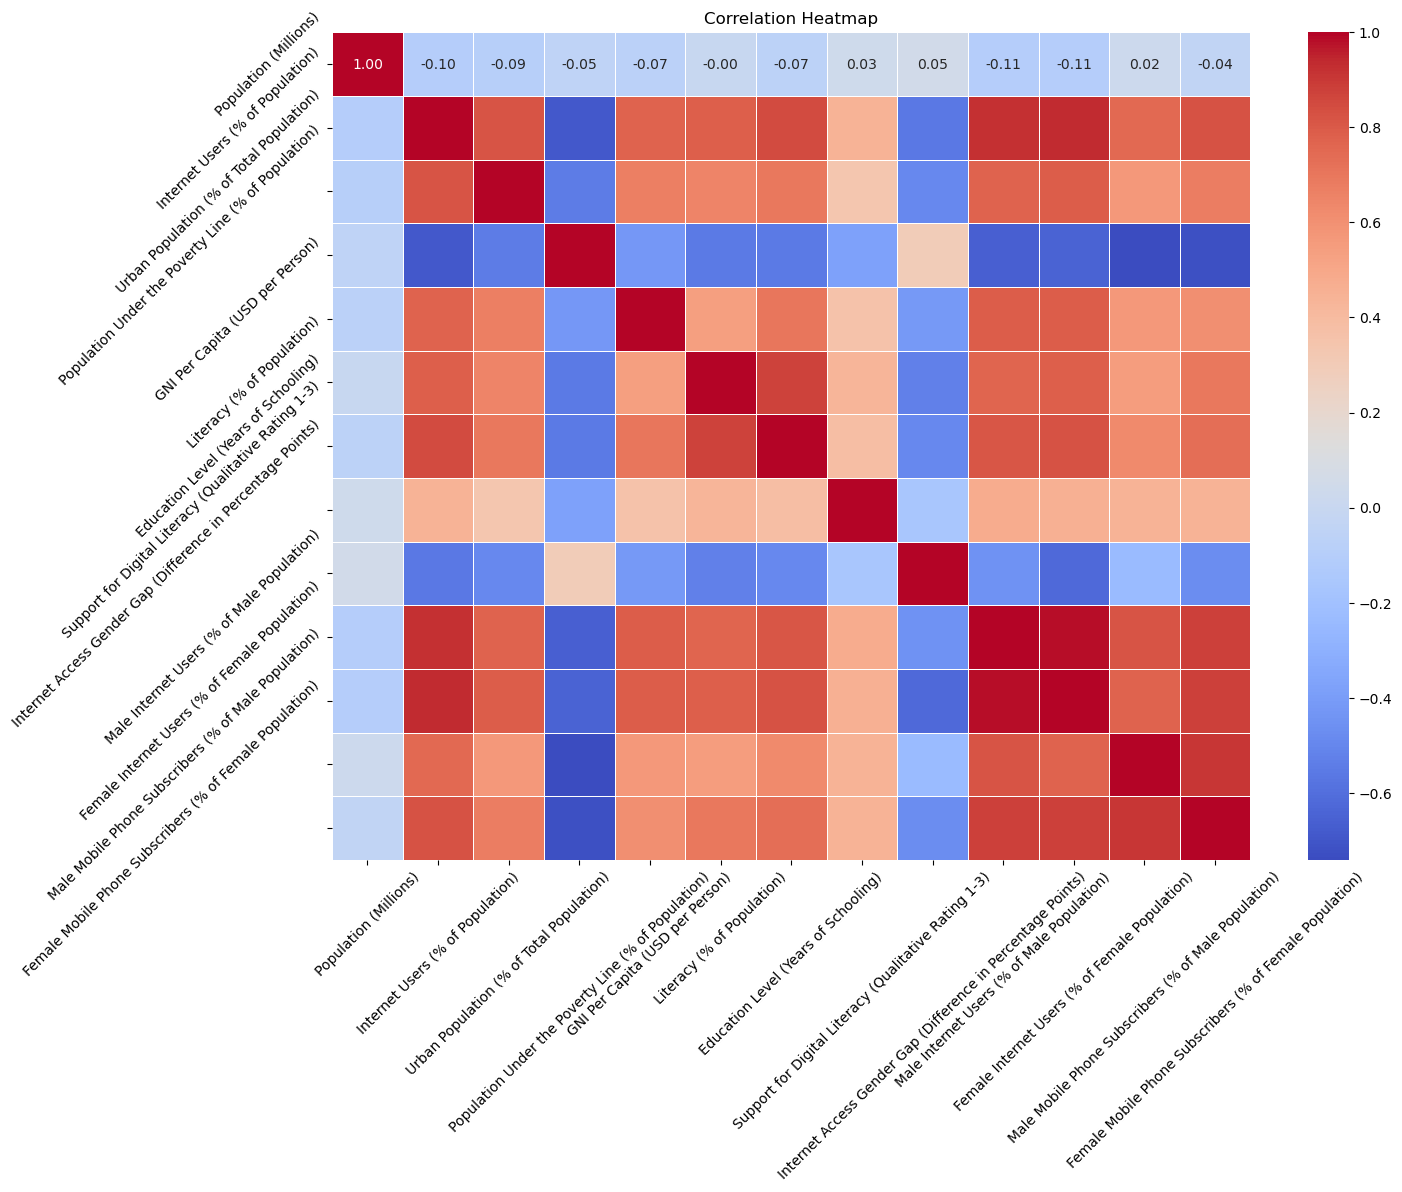

In [138]:
columns = [
    'Population (Millions)', 'Internet Users (% of Population)',
    'Urban Population (% of Total Population)', 'Population Under the Poverty Line (% of Population)',
    'GNI Per Capita (USD per Person)', 'Literacy (% of Population)',
    'Education Level (Years of Schooling)', 'Support for Digital Literacy (Qualitative Rating 1-3)',
    'Internet Access Gender Gap (Difference in Percentage Points)',
    'Male Internet Users (% of Male Population)', 'Female Internet Users (% of Female Population)',
    'Male Mobile Phone Subscribers (% of Male Population)',
    'Female Mobile Phone Subscribers (% of Female Population)'
]

# Calculate the correlation matrix for the specified columns
corr_matrix = demo_df[columns].corr()

# Generate a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.yticks(rotation=45)  # Rotate y labels for better visibility
plt.tight_layout()  # Adjust the layout

# Save the figure
plt.savefig("Graphics/Correlation_Heatmap.png")

plt.show()